In [1]:
import pandas as pd
import geopandas as gpd
import shapely

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

In [2]:
df = pd.read_csv('Anabasis.csv')
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])

In [3]:
gdf = gpd.GeoDataFrame(df)

gdf.set_crs(epsg=4326, allow_override=True, inplace=True)

stamen_terrain = cimgt.Stamen('terrain-background')
stm_crs = stamen_terrain.crs

crs_proj4 = stm_crs.proj4_init
gdf = gdf.to_crs(crs_proj4)

padding = 1
extents = [gdf['longitude'].min() - padding, gdf['longitude'].max() + padding, gdf['latitude'].min() - padding, gdf['latitude'].max() + padding]

In [4]:
path = shapely.geometry.LineString(
    gdf['geometry'].values
)
path_df = gpd.GeoDataFrame({
    'geometry': [path]
})

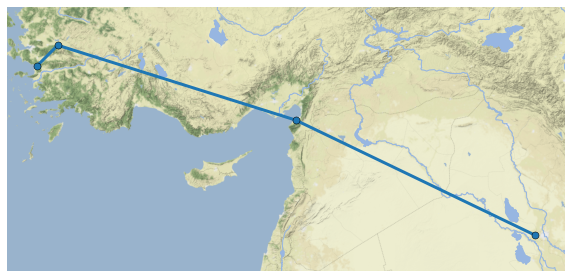

In [10]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1, projection = stm_crs)
ax.set_extent(extents, crs=ccrs.Geodetic())

ax.add_image(stamen_terrain, 8)

ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

ax.set_axis_off()

path_df.plot(
    linewidth=3,
    ax=ax
)

gdf.plot(
    ax=ax,
    markersize=50,
    edgecolor='black',
    linewidth=0.5,
    zorder=1000 # force the points to be the top layer of the plot
)

plt.show()